### 네트워크 플로우
- 한 정점에서 다른 정점까지 흐를 수 있는 데이터의 최대 크기가 어느정도인지 확인하는 알고리즘
- 각 간선에 대해 `유량(Flow)`과 `용량(Capacity)`의 개념이 사용된다.
  - `용량`은 간선이 흐를 수 있는 데이터의 최대 크기를 의미한다.
  - `유량`은 간선에 흐르는 데이터의 양을 의미한다.
    - 두 정점 `u, v`에 대해서 `u` -> `v`으로 흐르는 `유량`은 $\operatorname{f}\left( u, v \right)$ 라고 표현한다. 
    - 마찬가지로 `u` -> `v`의 `용량`은 $\operatorname{c}\left( u, v \right)$ 라고 표현한다.

### 최대 유량 문제와 특징
- 유량 그래프 $G = (V, E)$, 용량(capacity) $c : E \rightarrow \Z_+$ 시점(source) $s \in V$, 종점(sink) $t \in V$ 이 주워졋을 때
  - $\Z_+$ 는 0을 포함하는 자연수를 뜻하는듯 하다. \
  따라서 $c : E \rightarrow \Z_+$ : 각 간선은 0을 포함하는 자연수의 용량을 가진다는 의미
- 모든 간선 $e \in E$ 마다 $0 \le f(e) \le c(e)$ 를 만족하고,
  - 따라서 `유량`이 흘러갈 모든 경로의 각 `용량`보다 클 수 없다.
  - 또한, 어떤 경로를 선택했을 때 `유량`이 흘러갈 수 있는 최대 크기는 `경로상의 간선의 최소 용량`이다.
  - 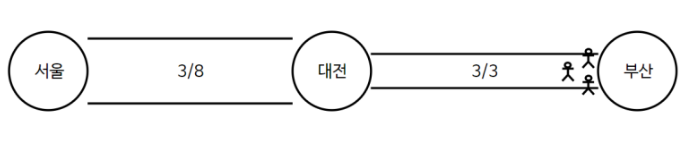
- $s, e$ 를 제외한 모든 정점 $v$ 마다 $\sum_{e \text { into } v}f(e) = \sum_{e \text{ out of }v}f(e)$ 를 만족하는,
  -  `= s, e를 제외하고 유입 유량의 총합과 유출 유량의 총합이 같은`
  - $_\text{out of}$ 는 `밖으로 나가는` 이라고 해석해야 한다.
  - 이는 또한 `s`에서의 유출 유량과 `t`로의 유입 유량은 같아야 한다는 의미도 가지고 있다.
- 흐름 $f$ 중 흐름양(flow amount) $|f| := \sum_{e \text{ out of }s}f(e) - \sum_{e \text{ into }s}f(e)$ 가 가장 큰 것을 찾는 문제이다.

### Ford-Fulkerson algorithm
- 이 알고리즘의 동작은 다음과 같다.
  1. `S`에서 `T`로 가는 `증강 경로(augmenting path)` $A$를 찾는다.
      - 이때 경로상의 모든 경로에 `여유 용량(residual capacity)`이 남아있어야 한다.\
      즉, $v \in A$에 대해 $\operatorname{c}(u, v) - \operatorname{f}(u, v) > 0$ 이어야 한다.
      - `S`에서 `T`까지 가는 어떤 경로든 상관 없다. 따라서 DFS나 BFS를 사용해도 되지만, 이 알고리즘에선 DFS를 사용한다.
  2. $A$의 `여유 용량(residual capacity)` $c$를 계산한다.
      - 가능한 최대의 유량을 흘려보낼 것이기 때문에, 경로상의 모든 간선의 `여유 용량(residual capacity)` 중 최소값을 구한다.
      - $c_f(A) = \min\{\operatorname{c}(u, v) - \operatorname{f}(u, v) \mid (u, v) \in A\}$
  3. 경로상의 모든 간선에 $c$만큼의 유량을 흘려보낸다.\
  이때, 유량 그래프의 4번 성질에 의해 역방향으로 같은 크기의 음의 유량을 동시에 흘려보낸다.
      - $f(u, v) \leftarrow f(u, v) + c$
      - $f(v, u) \leftarrow f(v, u) - c$
  - 위 과정을 더 이상의 증강 경로가 없을때까지 반복한다.
- 이 알고리즘의 시간복잡도는 $f^*$를 최대 유량(즉, 문제의 답)이라고 할 때, $\Omicron(f^* \cdot (V + E))$이다.
  - DFS의 시간복잡도는 $\Omicron(V + E)$ 이다.
  - 용량의 단위가 1이라고 할때, 한번 경로를 찾았을 때 유량은 적어도 1씩은 보내지게 된다.
    - 최악의 경우, 이 증가 경로를 최대 $f^*$ 번 찾아야 하므로 $\Omicron(f^* \cdot (V + E))$ 이다.
    - 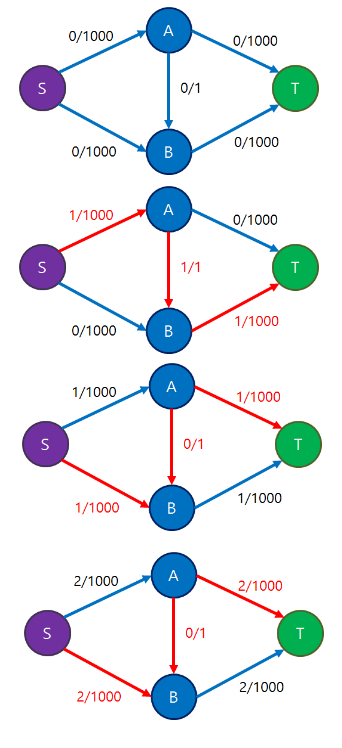

#### 구현
- 모든 설명은 6086(최대 유량) 참고

In [ ]:
def dfs(C, F, vis, V, u, snk, cur= 1 << 63) :
  if u == snk: return cur

  vis[u] = True
  for v in range(V) :
    if vis[v] or F[u][v] >= C[u][v] : continue
    A = min(cur, C[u][v] - F[u][v])
    tmp = dfs(C, F, vis, V, v, snk, A)
    if tmp :
      F[u][v] += tmp
      F[v][u] -= tmp
      return tmp
  return 0

def fulkerson(C, src, snk) :
  V = len(C)
  F = [[0] * V for _ in range(V)]
  ret = 0

  while True :
    vis = [False] * V
    cur = dfs(C, F, vis, V, src, snk)
    if cur == 0 : break
    ret += cur

  return ret


### Edmonds-Karp algorithm
- Ford-Fulkerson algorithm의 구현 방법 중 하나로, BFS를 사용하여 증강 경로를 찾는다.
  - 각 정점마다 가장 짧은 경로를 찾아내기 때문에 시간복잡도가 $\Omicron(|V||E|^2)$ 로 개선된다.
- 입력: 유량 네트워크 $G$, c, source $s$, sink $t$\
출력: 최대 유량
1. $f \leftarrow 0$ 
2. $G_f$ 에서 $s$ 에서 $t$ 에 도달할 수 없을 때 까지 아래를 반복한다.
    - $G_f$ 에서 $s$ 에서 $t$ 로 가는 경로 중 `간선의 개수가 가장 적은 경로 하나`를 $P$라고 할 때
    - $f \leftarrow f \uparrow f_P$
      - $f$를 잔여용량 $f_P$ 를 따르는 경로 $P$를 따라 증강시키는 것으로 갱신한다.
3. $f$를 반환한다.

In [ ]:
import collections
def edmonds(C, src, snk) :
  V = len(C)
  F = [[0] * V for _ in range(V)]
  ret = 0

  while True :
    tmp = 0
    Q = collections.deque()
    vis = [False] * V
    P = [-1] * V
    vis[src] = True
    Q.append((src, 1 << 63))

    while Q :
      front = Q.popleft()
      u, cur = front
      if u == snk :
        tmp = cur
        break
      for v in range(V) :
        if vis[v] or F[u][v] >= C[u][v] : continue
        vis[v] = True
        P[v] = u
        Q.append((v, min(cur, C[u][v] - F[u][v])))

    if P[snk] == -1: break
    ret += tmp
    p = P[snk]
    u = snk
    while p != -1 :
      F[p][u] += tmp
      F[u][p] -= tmp
      u = p
      p = P[u]
  return ret

### Dinic's Algorithm (Dinitz's Algorithm)
- Yefim Dinitz가 만든 알고리즘인데 발표하는 과정에서 이름이 Dinic으로 잘못 옮겨져서 Dinic's Algorithm으로 알려졌다.
- https://gazelle-and-cs.tistory.com/84

In [ ]:
INF = float("inf")
class Dinic:
  def __init__(self, n):
    self.lvl = [0] * n
    self.ptr = [0] * n
    self.q = [0] * n
    self.adj = [[] for _ in range(n)]

  def add_edge(self, a, b, c, rcap=0):
    self.adj[a].append([b, len(self.adj[b]), c, 0])
    self.adj[b].append([a, len(self.adj[a]) - 1, rcap, 0])

  def dfs(self, v, t, f):
    if v == t or not f:
      return f

    for i in range(self.ptr[v], len(self.adj[v])):
      e = self.adj[v][i]
      if self.lvl[e[0]] == self.lvl[v] + 1:
        p = self.dfs(e[0], t, min(f, e[2] - e[3]))
        if p:
          self.adj[v][i][3] += p
          self.adj[e[0]][e[1]][3] -= p
          return p
      self.ptr[v] += 1

    return 0

  def calc(self, s, t):
    flow, self.q[0] = 0, s
    for l in range(31):
      while True:
        self.lvl, self.ptr = [0] * len(self.q), [0] * len(self.q)
        qi, qe, self.lvl[s] = 0, 1, 1
        while qi < qe and not self.lvl[t]:
          v = self.q[qi]
          qi += 1
          for e in self.adj[v]:
            if not self.lvl[e[0]] and (e[2] - e[3]) >> (30 - l):
              self.q[qe] = e[0]
              qe += 1
              self.lvl[e[0]] = self.lvl[v] + 1

        p = self.dfs(s, t, INF)
        while p:
          flow += p
          p = self.dfs(s, t, INF)

        if not self.lvl[t]:
          break

    return flow

- 간선이 아주 많거나, 인접 벡터가 주워진 경우 좀더 효율적으로 작동하는 코드

In [ ]:
import collections
def bfs(C, F, l, src, snk) :
  V = len(C)
  Q = collections.deque()
  Q.append(src)
  l[src] = 0
  while Q :
    u = Q.popleft()
    for v in range(V) :
      if l[v] == -1 and C[u][v] - F[u][v] > 0 :
        l[v] = l[u] + 1
        Q.append(v)
  return l[snk] != -1

def dfs(C, F, W, l, u, snk, cur = 1 << 63) :
  if u == snk : return cur
  V = len(C)
  while W[u] < V :
    v = W[u]
    if l[v] == l[u] + 1 and C[u][v] > F[u][v] :
      A = min(cur, C[u][v] - F[u][v])
      tmp = dfs(C, F, W, l, v, snk, A)
      if tmp > 0 :
        F[u][v] += tmp
        F[v][u] -= tmp
        return tmp
    W[u] += 1
  return 0

def dinic(C, src, snk) :
  V = len(C)
  F = [[0] * V for _ in range(V)]
  ret = 0

  while True :
    l = [-1] * V
    W = [0] * V
    if not bfs(C, F, l, src, snk) : break
    while True:
      tmp = dfs(C, F, W, l, src, snk)
      if tmp == 0 : break
      ret += tmp
  return ret